Name: Zhuoyou Shen

ID: 2035073656

GitHub Username: zhuoyous

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from numpy import arange, column_stack
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn import metrics

1.

(b)

In [2]:
data = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')

In [3]:
data

AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]

i.

There are 9568 rows and 5 columns.

Columns consists of features of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

Rows stand for instance. For example, 9568 rows mean there are 9568 samples. 

ii.

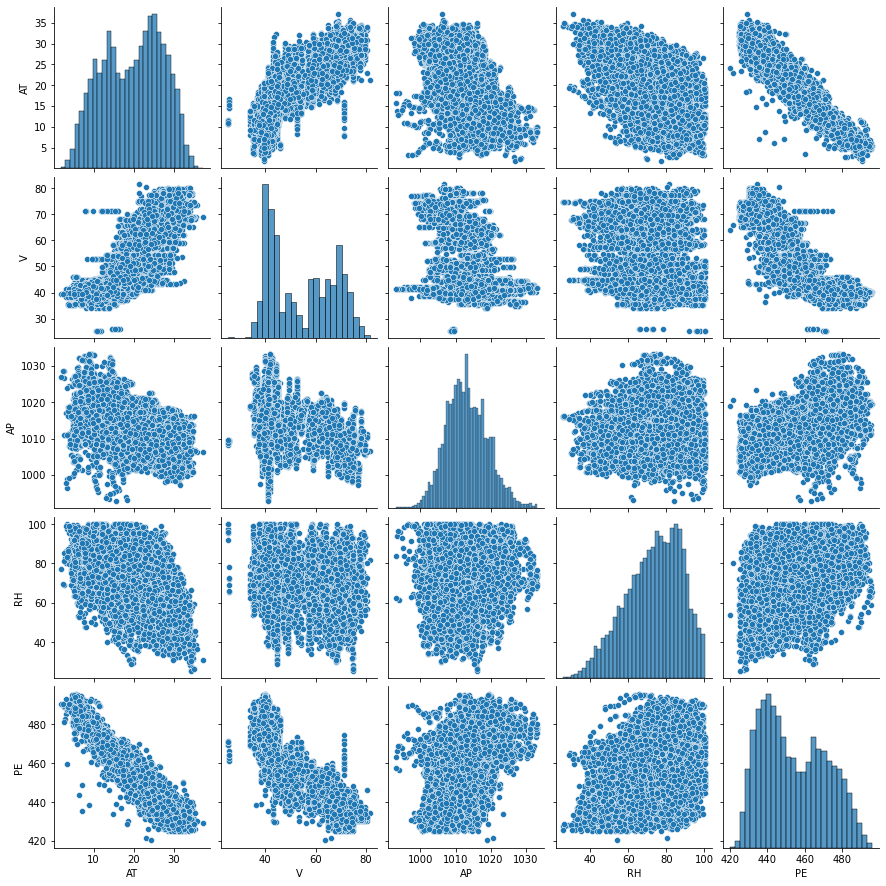

In [4]:
data1 = data[['AT','V','AP','RH','PE']]
sns.pairplot(data)

Since we are using these features to predict the net hourly electrical energy output (EP) of the plant, we only need to obeserve the last columns of the scatter plot. According to the graph, the linear relationship between AT and PE is very clear. However, compared to the V with PE, AP with PE, and RH with PE, the linear relationship is getting worse. 

iii.

In [5]:
data.describe()

AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

In [6]:
Mean = data.mean()
Median = data.median()
Range = data.max() - data.min()
first_quart = data.quantile(0.25)
third_quart = data.quantile(0.75)
interquart = data.quantile(0.75) - data.quantile(0.25)
table = {'Name':['Mean','Median','Range','First quartile','Third Quartile','Interquartile Range'],
         'AT':[Mean[0],Median[0],Range[0],first_quart[0], third_quart[0], interquart[0]],
         'V':  [Mean[1], Median[1], Range[1], first_quart[1], third_quart[1],interquart[1]],
         'AP': [ Mean[2], Median[2], Range[2], first_quart[2], third_quart[2],interquart[2]],
         'RH': [ Mean[3], Median[3], Range[3], first_quart[3], third_quart[3],interquart[3]],
         'PE': [Mean[4], Median[4], Range[4], first_quart[4], third_quart[4],interquart[4]]
        }
df = pd.DataFrame(table)
df

Name         AT          V           AP         RH  \
0                 Mean  19.651231  54.305804  1013.259078  73.308978   
1               Median  20.345000  52.080000  1012.940000  74.975000   
2                Range  35.300000  56.200000    40.410000  74.600000   
3       First quartile  13.510000  41.740000  1009.100000  63.327500   
4       Third Quartile  25.720000  66.540000  1017.260000  84.830000   
5  Interquartile Range  12.210000  24.800000     8.160000  21.502500   

           PE  
0  454.365009  
1  451.550000  
2   75.500000  
3  439.750000  
4  468.430000  
5   28.680000

(c)

In [7]:
label = ['AT','V','AP','RH']
for i in label:
    
    train_x = data[i]
    train_y = data['PE']
    LR = LinearRegression()
    model = LR.fit(train_x.values.reshape(-1,1),train_y.values)
    X = sm.add_constant(train_x.values.reshape(-1,1))
    model2 = sm.OLS(train_y.values, X).fit()
    print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:16   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

As we can see from the table, each predictor: [ AT,V,AP,RH ]. There is statistically significant association between it and the response [PE]

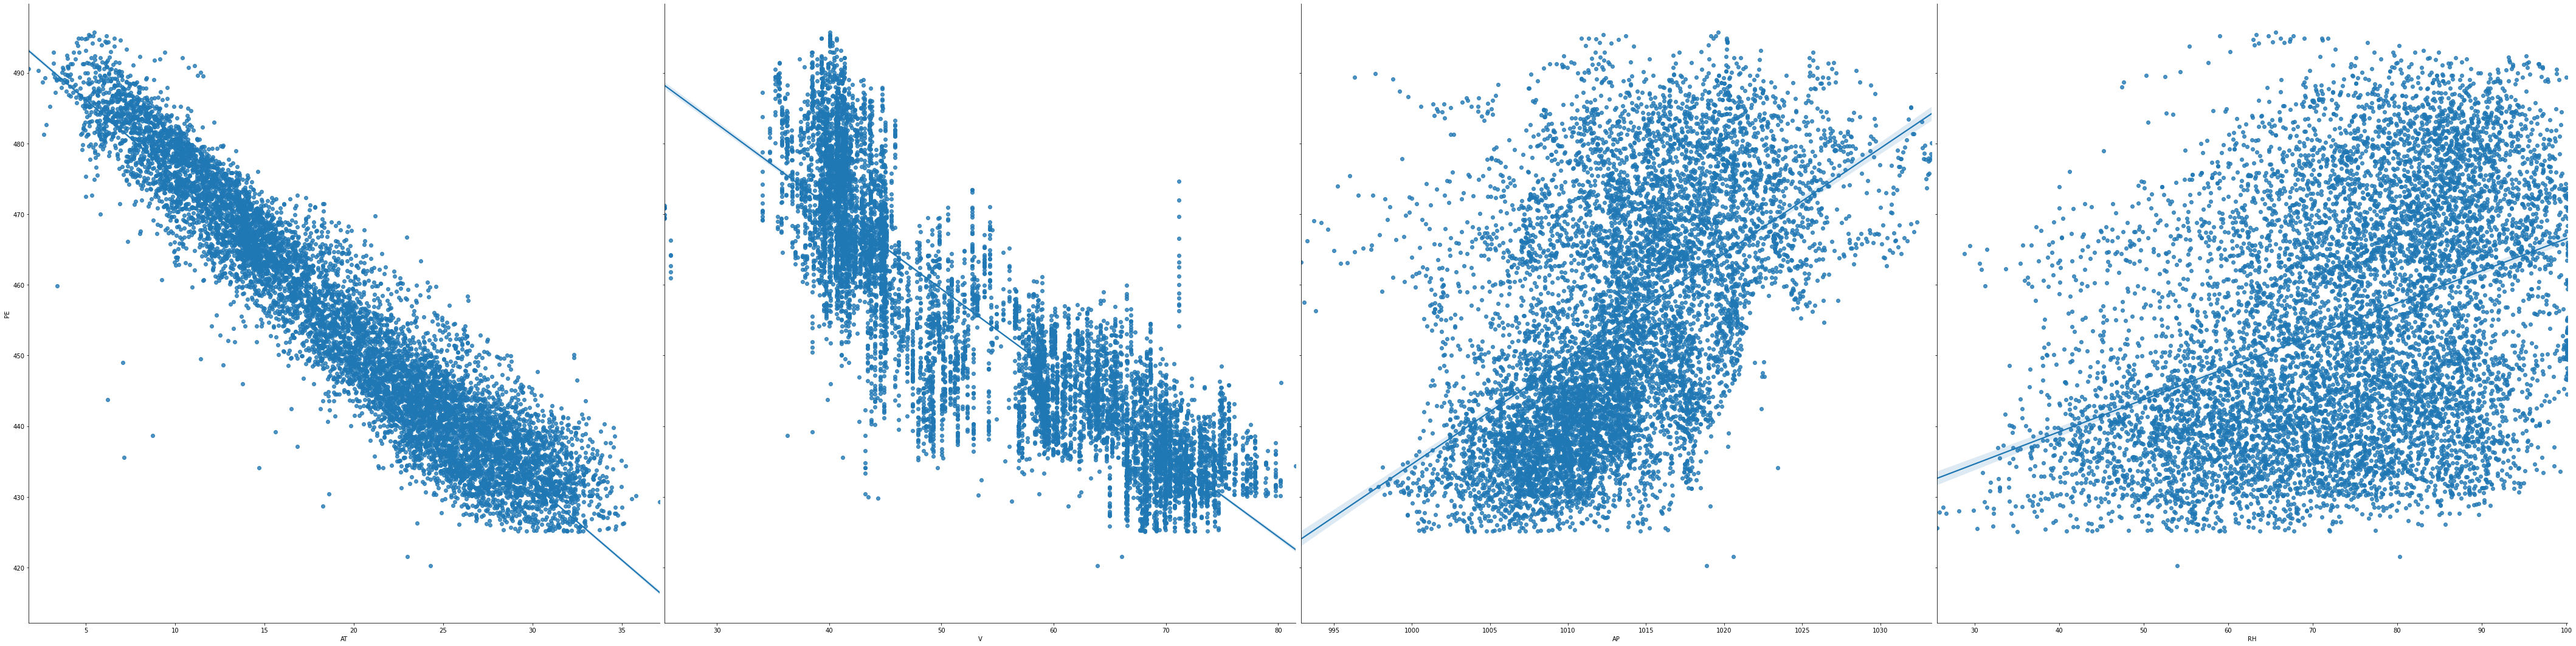

In [8]:
sns.pairplot(data,x_vars=['AT','V','AP', 'RH'], y_vars='PE',diag_kind = None,kind = 'reg',height = 15)

As we can see, there exit some outliers.

(d)

In [9]:
train_x = data[['AT','V','AP', 'RH']]
train_y = data['PE']
LR = LinearRegression()
model = LR.fit(train_x.values,train_y.values)
X = sm.add_constant(train_x)
model2 = sm.OLS(train_y.values, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:19   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

As we can see above, every predictor is significantly important so that we could reject the null hypothesis $H_0$ : $\beta_j$ = 0

(e)

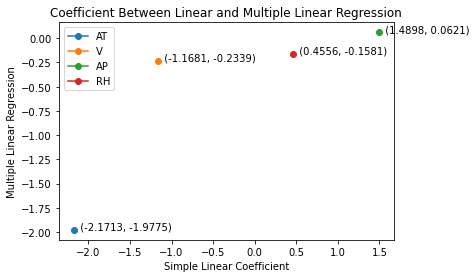

In [10]:
plt.title('Coefficient Between Linear and Multiple Linear Regression')
plt.xlabel("Simple Linear Coefficient")
plt.ylabel("Multiple Linear Regression")
plt.plot(-2.1713, -1.9775,marker="o",label = 'AT')
plt.plot(-1.1681, -0.2339,marker = 'o',label ='V')
plt.plot(1.4898, 0.0621,marker = 'o',label = 'AP')
plt.plot(0.4556, -0.1581,marker = 'o',label = 'RH')
plt.annotate('  (-2.1713, -1.9775)' ,xy=(-2.1713, -1.9775))
plt.annotate('  (-1.1681, -0.2339)' ,xy=(-1.1681, -0.2339))
plt.annotate('  (1.4898, 0.0621)' ,xy=(1.4898, 0.0621))
plt.annotate('  (0.4556, -0.1581)' ,xy=(0.4556, -0.1581))
plt.legend()

(f)

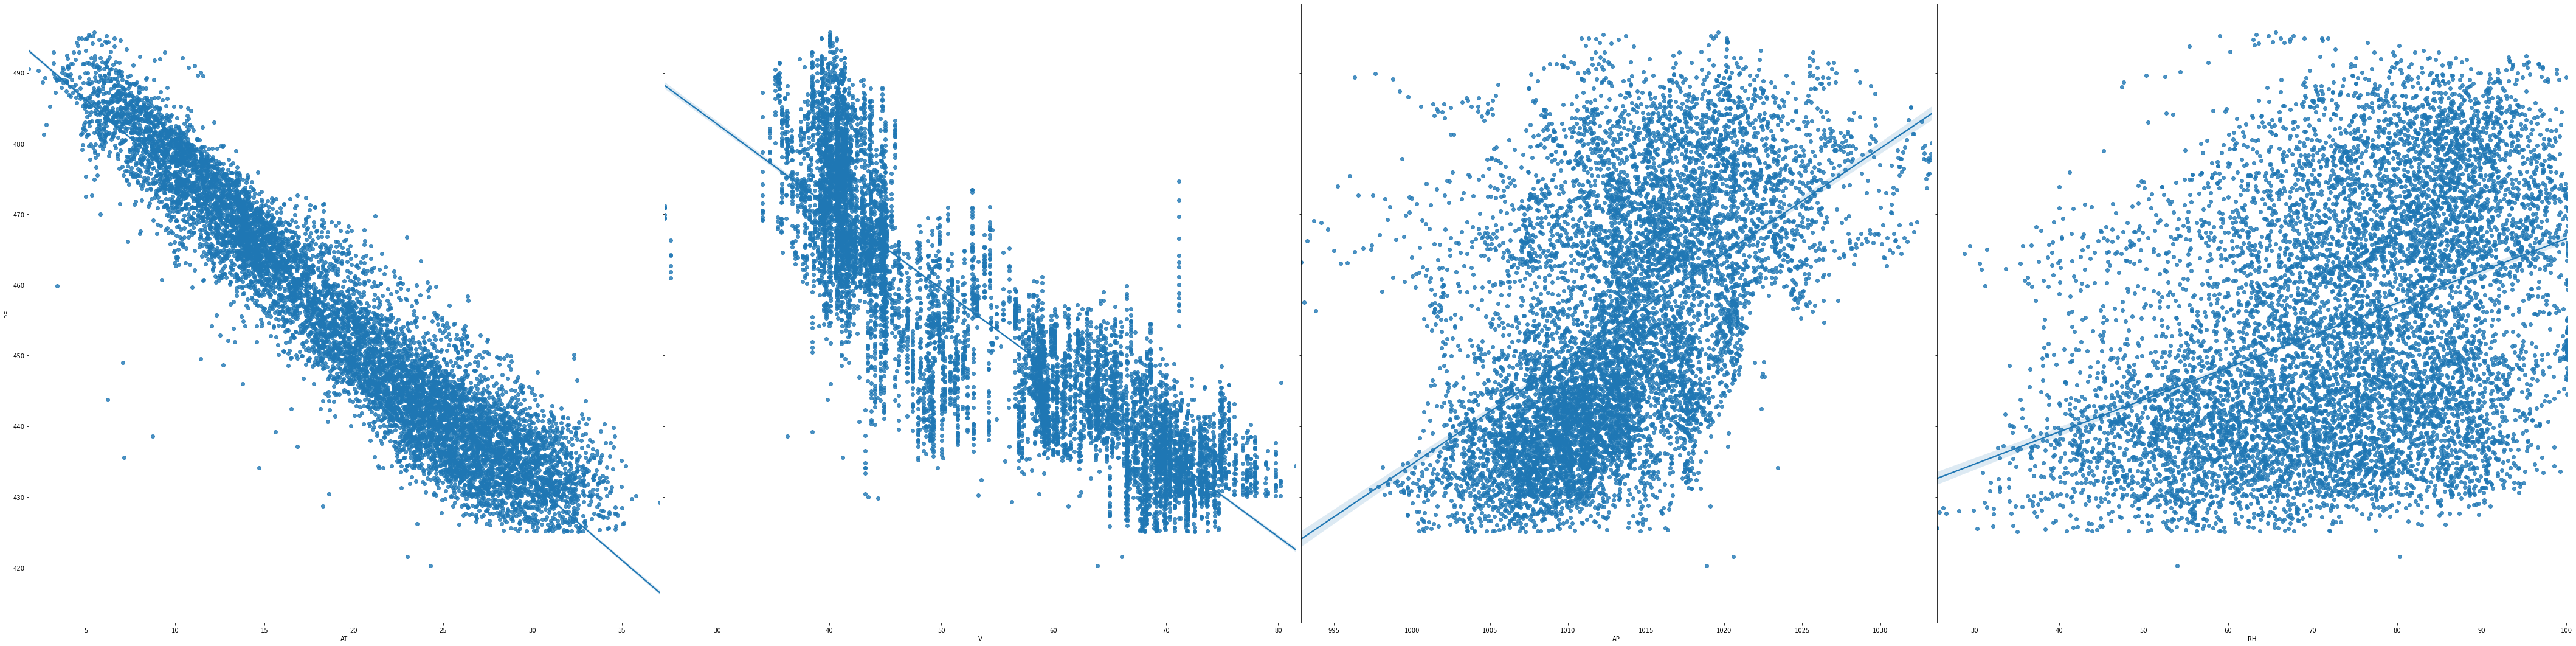

In [11]:
sns.pairplot(data,x_vars=['AT','V','AP', 'RH'], y_vars='PE',diag_kind = None,kind = 'reg',height = 15)

As we can see from the graph, using the linear relationship is farfetched. Maybe it is ok with the first graph. However, the following graph does not fit the linear relationship well. Thus, we will consider some nonlinear relationships. 

In [12]:
label = ['AT','V','AP','RH']
for i in label:
    
    train_x = data[i].values.reshape(-1,1)
    train_y = data['PE'].values.reshape(-1,1)
    x = arange(data[i].min(),data[i].max(),1).reshape(-1,1)
    multi_model = PolynomialFeatures(degree = 3)
    multi_x = multi_model.fit_transform(train_x)
    X = column_stack((train_x, train_x**2, train_x**3))
    X = sm.add_constant(X)
    model2 = sm.OLS(train_y, X).fit()
    print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:23   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

As we can see from the graph by the p value, only for predictor V, V^2 and V^3 not statistically important. For other predictor, AT,AP,RH, there exists nonlinear associations. 

(g)

In [13]:
data

AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]

In [14]:
a = data['AT'].values
b = data['V'].values
c = data['AP'].values
d = data['RH'].values
ab = a*b
ac = a*c
ad = a*d
bc = b*c
bd = b*d
cd = c*d
new_data = data.drop(columns = ['PE'])
new_data['AT*V'] = ab
new_data['AT*AP'] = ac
new_data['AT*RH'] = ad
new_data['V*AP'] = bc
new_data['V*RH'] = bd
new_data['AP*RH'] = cd
train_y = data['PE']
X = sm.add_constant(new_data)
model2 = sm.OLS(train_y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:23   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

As we can see from the graph above, interaction term AT * V,AT * RH,and V * AP are statistcally important.

(h)

In [15]:
a = data['AT'].values
b = data['V'].values
c = data['AP'].values
d = data['RH'].values
ab = a*b
ac = a*c
ad = a*d
bc = b*c
bd = b*d
cd = c*d
newdata = data
newdata = data.drop(columns = ['PE'])
newdata['AT*V'] = ab
newdata['AT*AP'] = ac
newdata['AT*RH'] = ad
newdata['V*AP'] = bc
newdata['V*RH'] = bd
newdata['AP*RH'] = cd
newdata['AT^2'] = a*a
newdata['V^2'] = b*b
newdata['AP^2'] = c*c
newdata['RH^2'] = d*d
newdata['PE'] = data['PE']
newdata

AT      V       AP     RH       AT*V       AT*AP      AT*RH  \
0     14.96  41.76  1024.07  73.17   624.7296  15320.0872  1094.6232   
1     25.18  62.96  1020.04  59.08  1585.3328  25684.6072  1487.6344   
2      5.11  39.40  1012.16  92.14   201.3340   5172.1376   470.8354   
3     20.86  57.32  1010.24  76.64  1195.6952  21073.6064  1598.7104   
4     10.82  37.50  1009.23  96.62   405.7500  10919.8686  1045.4284   
...     ...    ...      ...    ...        ...         ...        ...   
9563  16.65  49.69  1014.01  91.00   827.3385  16883.2665  1515.1500   
9564  13.19  39.18  1023.67  66.78   516.7842  13502.2073   880.8282   
9565  31.32  74.33  1012.92  36.48  2328.0156  31724.6544  1142.5536   
9566  24.48  69.45  1013.86  62.39  1700.1360  24819.2928  1527.3072   
9567  21.60  62.52  1017.23  67.87  1350.4320  21972.1680  1465.9920   

            V*AP       V*RH       AP*RH      AT^2        V^2          AP^2  \
0     42765.1632  3055.5792  74931.2019  223.8016  1743.8976  1.048719e+06   
1     64221.7184  3719.6768  60263.9632  634.0324  3963.9616  1.040482e+06   
2     39879.1040  3630.3160  93260.4224   26.1121  1552.3600  1.024468e+06   
3     57906.9568  4393.0048  77424.7936  435.1396  3285.5824  1.020585e+06   
4     37846.1250  3623.2500  97511.8026  117.0724  1406.2500  1.018545e+06   
...          ...        ...         ...       ...        ...           ...   
9563  50386.1569  4521.7900  92274.9100  277.2225  2469.0961  1.028216e+06   
9564  40107.3906  2616.4404  68360.6826  173.9761  1535.0724  1.047900e+06   
9565  75290.3436  2711.5584  36951.3216  980.9424  5524.9489  1.026007e+06   
9566  70412.5770  4332.9855  63254.7254  599.2704  4823.3025  1.027912e+06   
9567  63597.2196  4243.2324  69039.4001  466.5600  3908.7504  1.034757e+06   

           RH^2      PE  
0     5353.8489  463.26  
1     3490.4464  444.37  
2     8489.7796  488.56  
3     5873.6896  446.48  
4     9335.4244  473.90  
...         ...     ...  
9563  8281.0000  460.03  
9564  4459.5684  469.62  
9565  1330.7904  429.57  
9566  3892.5121  435.74  
9567  4606.3369  453.28  

[9568 rows x 15 columns]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(newdata.iloc[:,:14],newdata.iloc[:,-1],test_size=0.3)

The regression model on a
randomly selected 70% subset of the data with all predictors.

In [17]:
x_allpredictor = x_train.iloc[:,:4]
x_allpredictor = sm.add_constant(x_allpredictor)
model_allpredictor = sm.OLS(y_train, x_allpredictor).fit()
print(model_allpredictor.summary())
smallest_linear = model_allpredictor.summary()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.186e+04
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:23   Log-Likelihood:                -19643.
No. Observations:                6697   AIC:                         3.930e+04
Df Residuals:                    6692   BIC:                         3.933e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        445.0535     11.656     38.182      0.0

In [18]:
LR=LinearRegression().fit(x_train.iloc[:,:4],y_train)
y_predict_train1=LR.predict(x_train.iloc[:,:4])
mse_train1=mean_squared_error(y_train,y_predict_train1)
print('The trainning error is',mse_train1)

The trainning error is 20.664377119647686


In [19]:
y_predict_test1 =LR.predict(x_test.iloc[:,:4])
mse_test1=mean_squared_error(y_test,y_predict_test1)
print('The testing error is',mse_test1)
small_test = mse_test1

The testing error is 21.022785991046923


Regression model involving all possible interaction terms and quadratic nonlinearities

In [20]:
x_allpredictor = x_train.iloc[:,:14]
x_allpredictor = sm.add_constant(x_allpredictor)
model_allpredictor = sm.OLS(y_train, x_allpredictor).fit()
print(model_allpredictor.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7213.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:23   Log-Likelihood:                -19188.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6682   BIC:                         3.851e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8181.5389   1453.581     -5.629      0.0

In [21]:
LR=LinearRegression().fit(x_train,y_train)
y_predict_train1=LR.predict(x_train)
mse_train1=mean_squared_error(y_train,y_predict_train1)
print('The trainning error is',mse_train1)

The trainning error is 18.039725590098662


In [22]:
y_predict_test1 =LR.predict(x_test)
mse_test1=mean_squared_error(y_test,y_predict_test1)
print('The testing error is',mse_test1)

The testing error is 18.282236220664224


According to the graph, we are going to drop V, V^2, V* RH ,V* AP ,AT* AP ,and AT

Regression model with significant terms

In [23]:
x_train = x_train.drop(columns = ['V'])
x_train = x_train.drop(columns = ['V^2'])
x_train = x_train.drop(columns = ['V*RH'])
x_train = x_train.drop(columns = ['V*AP'])
x_train = x_train.drop(columns = ['AT*AP'])
x_train = x_train.drop(columns = ['AT'])
y_train = y_train.drop(columns = ['V'])
y_train = y_train.drop(columns = ['V^2'])
y_train = y_train.drop(columns = ['V*RH'])
y_train = y_train.drop(columns = ['V*AP'])
y_train = y_train.drop(columns = ['AT*AP'])
y_train = y_train.drop(columns = ['AT'])
x_test = x_test.drop(columns = ['V'])
x_test = x_test.drop(columns = ['V^2'])
x_test = x_test.drop(columns = ['V*RH'])
x_test = x_test.drop(columns = ['V*AP'])
x_test = x_test.drop(columns = ['AT*AP'])
x_test = x_test.drop(columns = ['AT'])
y_test = y_test.drop(columns = ['V'])
y_test = y_test.drop(columns = ['V^2'])
y_test = y_test.drop(columns = ['V*RH'])
y_test = y_test.drop(columns = ['V*AP'])
y_test = y_test.drop(columns = ['AT*AP'])
y_test = y_test.drop(columns = ['AT'])


In [24]:
x_allpredictor = x_train.iloc[:,:-1]
x_allpredictor = sm.add_constant(x_allpredictor)
model_allpredictor = sm.OLS(y_train, x_allpredictor).fit()
print(model_allpredictor.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.196e+04
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:23   Log-Likelihood:                -19777.
No. Observations:                6697   AIC:                         3.957e+04
Df Residuals:                    6689   BIC:                         3.963e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4785.1156   1197.927     -3.994      0.0

In [25]:
LR=LinearRegression().fit(x_train,y_train)
y_predict_train1=LR.predict(x_train)
mse_train1=mean_squared_error(y_train,y_predict_train1)
print('The trainning error is',mse_train1)

The trainning error is 20.04599512999149


In [26]:
y_predict_test1 =LR.predict(x_test)
mse_test1=mean_squared_error(y_test,y_predict_test1)
print('The testing error is',mse_test1)


The testing error is 20.522160780875584


(i)

Raw Data

In [27]:
data4 = data
x_train,x_test,y_train,y_test=train_test_split(data4.iloc[:,:4],data4.iloc[:,-1],test_size=0.3)
test_error = []
train_error = []
for i in range(1,101,1):    
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    pre_train = KNN.predict(x_train)
    pre_test= KNN.predict(x_test)
    train_error.append(metrics.mean_squared_error(y_train, pre_train))
    test_error.append(metrics.mean_squared_error(y_test, pre_test))
knn_raw_mse = min(test_error)

Text(0, 0.5, 'MSE')

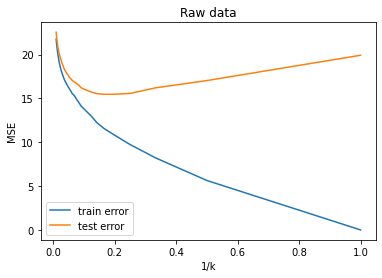

In [28]:
plt.title('Raw data')
plt.plot(1/arange(1,101,1),train_error,label = 'train error')
plt.plot(1/arange(1,101,1),test_error,label = 'test error')
plt.legend()
plt.xlabel("1/k")
plt.ylabel("MSE")

In [29]:
optimal_k_index = test_error.index(min(test_error))
optimal_k_index

5

Since the optimal k index is 5, the optimal k is when k = 6

In [30]:
norm_data1 = preprocessing.normalize(x_train)
norm_data2 = preprocessing.normalize(x_test)
column_title1 = ['AT','V','AP','RH']
knn_norm_data1 = pd.DataFrame(norm_data1)
knn_norm_data1.columns = column_title1
column_title2 = ['AT','V','AP','RH']
knn_norm_data2 = pd.DataFrame(norm_data2)
knn_norm_data2.columns = column_title2
test_error = []
train_error = []
for i in range(1,101,1):    
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(knn_norm_data1,y_train)
    pre_train = KNN.predict(knn_norm_data1)
    pre_test= KNN.predict(knn_norm_data2)
    train_error.append(metrics.mean_squared_error(y_train, pre_train))
    test_error.append(metrics.mean_squared_error(y_test, pre_test))
knn_normal_mse = min(test_error)

Text(0, 0.5, 'MSE')

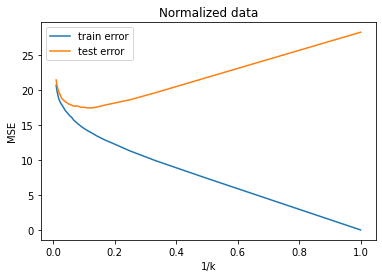

In [31]:
plt.title('Normalized data')
plt.plot(1/arange(1,101,1),train_error,label = 'train error')
plt.plot(1/arange(1,101,1),test_error,label = 'test error')
plt.legend()
plt.xlabel("1/k")
plt.ylabel("MSE")

In [32]:
optimal_k_index = test_error.index(min(test_error))
optimal_k_index

7

Since the optimal k index is 7, thus the optimal k is when k = 8

(j)

The smallest test error linear model

In [33]:
print(smallest_linear)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.186e+04
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:23   Log-Likelihood:                -19643.
No. Observations:                6697   AIC:                         3.930e+04
Df Residuals:                    6692   BIC:                         3.933e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        445.0535     11.656     38.182      0.0

In [34]:
small_test

21.022785991046923

In [35]:
knn_raw_mse

15.476501666086158

In [36]:
knn_normal_mse

17.457946964798847

As we can see, both KNN with raw data and normalized data have lower MSE


KNN Linear Regression is better

ISLR: 2.4.1

(a)

 The performance of a flexible statistical learning method is better than an inflexible method because when n is extremely large and the number of predictors is small, we have enough samples to be trained in the model and could get a good relationship between features and do not worry about overfittings. The flexible method helps us take full advantage of a large sample size.  

(b)

The performance of a flexible statistical learning method is worse than an inflexible method because it is the opposite side from above. With large numbers of predictors and small observations, we could have overfitting problems, and the relationship may not be good enough.

(c)

The flexible method is better because by using the flexibility, it helps us get the nonlinear relationships and nonlinear effect. If we use the inflexible method, we could not know how much the model's behaviors are influenced by characteristics of the data.

(d)

If we have high variance of the error terms, the performance of a flexible statistical learning method is worse than an inflexible method because the high variance with flexible method will be much easier to cause the overfitting problem. Also, high variance of the error term is actually the irreducible error as mentioned in class and it will make it large if we use the flexible method, which means that the flexible method will fit to the noise. 

ISLR: 2.4.7

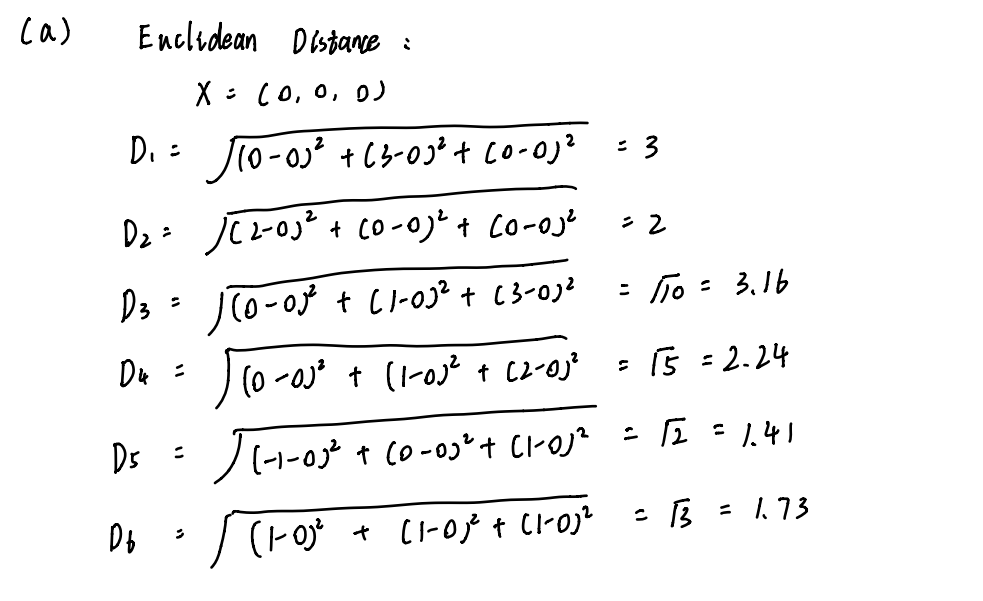

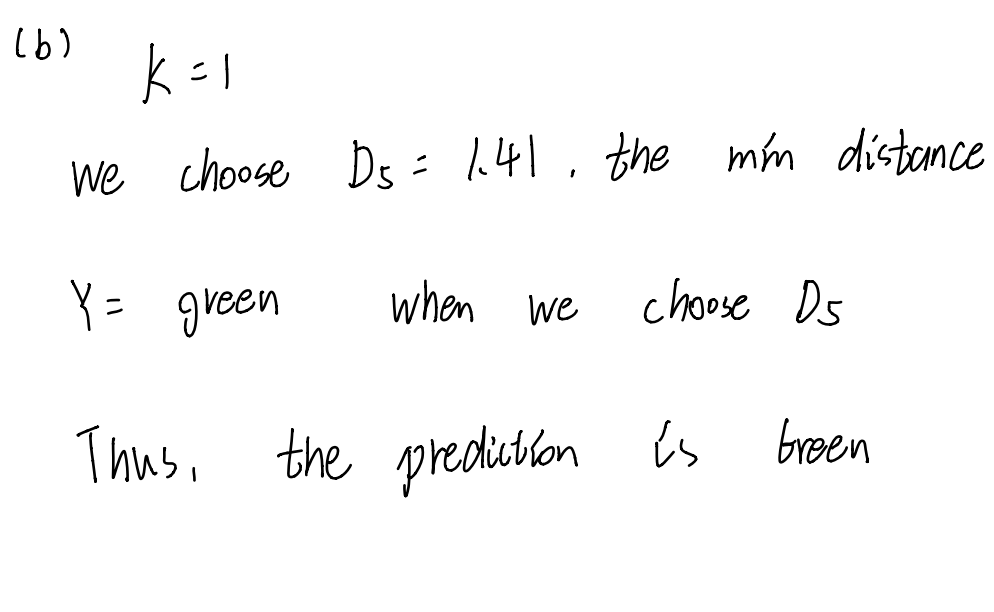

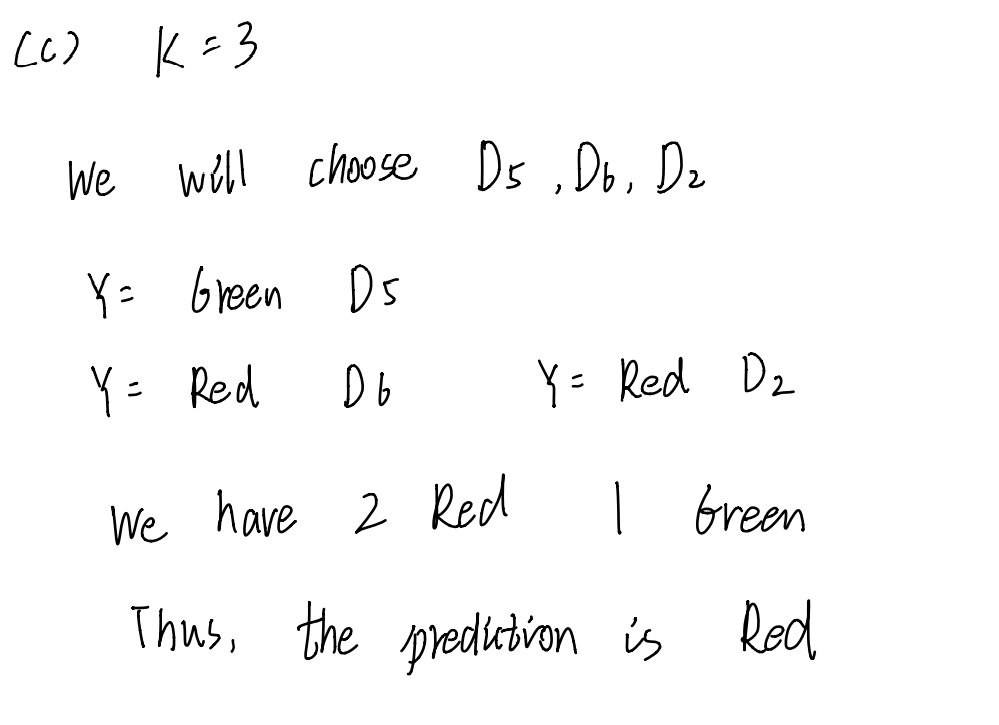

(d)

If the bayes decision boundary in the problem is highly nonlinear, the best k value should be small because as the value of k increases, the KNN method will become less flexible and consider more points. Moreover, it will cause the decision boundary to be more linear. To fit in the nonlinear context, we should use small value of k. 